In [2]:
import theano
import theano.tensor as T
import numpy as np

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5105)


In [3]:
from mnist import test_mlp

In [61]:
# Random Search of hyper parameters
random_state = np.random.RandomState(1908)
log_learning_rate = random_state.uniform(low=-1,high=-5,size=10).astype(np.float32)

learning_rate = 10 ** log_learning_rate

learning_rate_decay = random_state.uniform(low=0.994,high=0.999,size=10).astype(np.float32)
        
momentum = random_state.uniform(low=0.5,high=0.9,size=10).astype(np.float32)

bias_init = random_state.uniform(low=-10,high=-1,size=10).astype(np.float32)

activation = random_state.binomial(1,0.5,size=10).astype(np.int)

In [46]:
plain_score = []
plain_error = []

highway_score = []
highway_error = []
for i in range(10):
    
    test_score_plain, last_train_error, train_error_plain = test_mlp(learning_rate=learning_rate[i], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=50, highway=False, bias_init = None, 
                                   learning_rate_decay=learning_rate_decay[i], momentum=momentum[i], 
                                    batch_size=20, n_hidden=[71]*50, 
                                   n_hidden_layer=50, verbose=True, activation=activation[i])
    
    print ("####################################################")
    print("iter: %f type: 'plain' loss %f" %(i,last_train_error))
    print ("####################################################")
    
    plain_score.append(last_train_error)
    plain_error.append(train_error_plain)
    
    test_score_high, last_train_error1, train_error_highway = test_mlp(learning_rate=learning_rate[i], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=50, highway=True, bias_init = bias_init[i], 
                                   learning_rate_decay=learning_rate_decay[i], momentum=momentum[i], 
                                    batch_size=20, n_hidden=[50]*50, 
                                   n_hidden_layer=50, verbose=True, activation=activation[i])
    
    highway_score.append(last_train_error1)
    highway_error.append(train_error_highway)
    
    print ("####################################################")
    print("iter: %f type: 'highway' loss %f" %(i,last_train_error1))
    print ("####################################################")

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.031820  train loss 2.045536  learning_rate 0.000173
     epoch 1, minibatch 2500/2500, test error of best model 78.880000 %
epoch 2, minibatch 2500/2500, validation loss 1.801328  train loss 1.815505  learning_rate 0.000173
     epoch 2, minibatch 2500/2500, test error of best model 69.750000 %
epoch 3, minibatch 2500/2500, validation loss 1.499979  train loss 1.529390  learning_rate 0.000173
     epoch 3, minibatch 2500/2500, test error of best model 55.780000 %
epoch 4, minibatch 2500/2500, validation loss 1.254428  train loss 1.295335  learning_rate 0.000173
     epoch 4, minibatch 2500/2500, test error of best model 44.680000 %
epoch 5, minibatch 2500/2500, validation loss 1.102290  train loss 1.142888  learning_rate 0.000172
     epoch 5, minibatch 2500/2500, test error of best model 36.940000 %
epoch 6, minibatch 2500/2500, validation loss 0.866520  train loss 0.909234  learning_r

mnist.py:664: UserWarning: The parameter 'updates' of theano.function() expects an OrderedDict, got <type 'dict'>. Using a standard dictionary here results in non-deterministic behavior. You should use an OrderedDict if you are using Python 2.7 (theano.compat.OrderedDict for older python), or use a list of (shared, update) pairs. Do not just convert your dictionary to this type before the call as the conversion will still be non-deterministic.
  y: train_set_y[index * batch_size: (index + 1) * batch_size]
The code for file __file__ ran for 36.29m


Optimization complete. Best validation score of 16.801380 % obtained at iteration 95000, with test performance 4.700000 %
####################################################
iter: 0.000000 type: 'plain' loss 0.083163
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.300709  train loss 2.300524  learning_rate 0.000173
     epoch 1, minibatch 2500/2500, test error of best model 85.740000 %
epoch 2, minibatch 2500/2500, validation loss 2.297014  train loss 2.296802  learning_rate 0.000173
     epoch 2, minibatch 2500/2500, test error of best model 83.550000 %
epoch 3, minibatch 2500/2500, validation loss 2.290931  train loss 2.290704  learning_rate 0.000173
     epoch 3, minibatch 2500/2500, test error of best model 70.390000 %
epoch 4, minibatch 2500/2500, validation loss 2.278410  train loss 2.278107  learning_rate 0.000173
     epoch 4, minibatch 2500/2500, test error of best model


The code for file __file__ ran for 80.01m


Optimization complete. Best validation score of 227.840972 % obtained at iteration 10000, with test performance 74.530000 %
####################################################
iter: 0.000000 type: 'highway' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.868368  train loss 1.881378  learning_rate 0.000085
     epoch 1, minibatch 2500/2500, test error of best model 63.140000 %
epoch 2, minibatch 2500/2500, validation loss 1.349086  train loss 1.366662  learning_rate 0.000085
     epoch 2, minibatch 2500/2500, test error of best model 42.740000 %
epoch 3, minibatch 2500/2500, validation loss 0.977034  train loss 0.997023  learning_rate 0.000084
     epoch 3, minibatch 2500/2500, test error of best model 27.640000 %
epoch 4, minibatch 2500/2500, validation loss 0.739467  train loss 0.756993  learning_rate 0.000084
     epoch 4, minibatch 2500/2500, test error of best model 


The code for file __file__ ran for 29.12m


Optimization complete. Best validation score of 20.099612 % obtained at iteration 97500, with test performance 4.950000 %
####################################################
iter: 1.000000 type: 'plain' loss 0.077742
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.243104  train loss 2.244907  learning_rate 0.000085
     epoch 1, minibatch 2500/2500, test error of best model 45.000000 %
epoch 2, minibatch 2500/2500, validation loss 2.167200  train loss 2.170870  learning_rate 0.000085
     epoch 2, minibatch 2500/2500, test error of best model 39.900000 %
epoch 3, minibatch 2500/2500, validation loss 2.057738  train loss 2.063561  learning_rate 0.000084
     epoch 3, minibatch 2500/2500, test error of best model 36.640000 %
epoch 4, minibatch 2500/2500, validation loss 1.910200  train loss 1.918726  learning_rate 0.000084
     epoch 4, minibatch 2500/2500, test error of best model


The code for file __file__ ran for 83.88m


Optimization complete. Best validation score of 35.651299 % obtained at iteration 125000, with test performance 9.800000 %
####################################################
iter: 1.000000 type: 'highway' loss 0.384361
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.336345  train loss 1.352348  learning_rate 0.009074
     epoch 1, minibatch 2500/2500, test error of best model 56.740000 %
epoch 2, minibatch 2500/2500, validation loss 1.069835  train loss 1.103320  learning_rate 0.009035
     epoch 2, minibatch 2500/2500, test error of best model 45.270000 %
epoch 3, minibatch 2500/2500, validation loss 1.219730  train loss 1.262935  learning_rate 0.008996
epoch 4, minibatch 2500/2500, validation loss 1.585585  train loss 1.611327  learning_rate 0.008958
epoch 5, minibatch 2500/2500, validation loss 1.467061  train loss 1.511044  learning_rate 0.008919
epoch 6, minibatch 2500/2500


The code for file __file__ ran for 35.28m


Optimization complete. Best validation score of 87.712586 % obtained at iteration 15000, with test performance 37.060000 %
####################################################
iter: 2.000000 type: 'plain' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.009074
epoch 2, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.009035
epoch 3, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.008996
epoch 4, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.008958
epoch 5, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.008919
epoch 6, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.008881
epoch 7, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.008843
epoch 8, minibatch 2500/2500, validation loss nan


The code for file __file__ ran for 87.93m


Optimization complete. Best validation score of inf % obtained at iteration 1, with test performance 0.000000 %
####################################################
iter: 2.000000 type: 'highway' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.284569  train loss 2.285696  learning_rate 0.000069
     epoch 1, minibatch 2500/2500, test error of best model 89.780000 %
epoch 2, minibatch 2500/2500, validation loss 2.113544  train loss 2.122348  learning_rate 0.000069
     epoch 2, minibatch 2500/2500, test error of best model 81.570000 %
epoch 3, minibatch 2500/2500, validation loss 2.053663  train loss 2.066407  learning_rate 0.000069
     epoch 3, minibatch 2500/2500, test error of best model 78.580000 %
epoch 4, minibatch 2500/2500, validation loss 2.012759  train loss 2.025680  learning_rate 0.000069
     epoch 4, minibatch 2500/2500, test error of best model 78.730000 %



The code for file __file__ ran for 34.74m


Optimization complete. Best validation score of 24.904561 % obtained at iteration 122500, with test performance 6.900000 %
####################################################
iter: 3.000000 type: 'plain' loss 0.198112
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.283733  train loss 2.284396  learning_rate 0.000069
     epoch 1, minibatch 2500/2500, test error of best model 70.700000 %
epoch 2, minibatch 2500/2500, validation loss 2.263997  train loss 2.265347  learning_rate 0.000069
     epoch 2, minibatch 2500/2500, test error of best model 68.960000 %
epoch 3, minibatch 2500/2500, validation loss 2.241704  train loss 2.243812  learning_rate 0.000069
     epoch 3, minibatch 2500/2500, test error of best model 67.080000 %
epoch 4, minibatch 2500/2500, validation loss 2.215348  train loss 2.218330  learning_rate 0.000069
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 89.46m


Optimization complete. Best validation score of 51.298189 % obtained at iteration 125000, with test performance 13.640000 %
####################################################
iter: 3.000000 type: 'highway' loss 0.548170
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.096004  train loss 2.102081  learning_rate 0.000080
     epoch 1, minibatch 2500/2500, test error of best model 70.860000 %
epoch 2, minibatch 2500/2500, validation loss 1.720217  train loss 1.735716  learning_rate 0.000080
     epoch 2, minibatch 2500/2500, test error of best model 58.620000 %
epoch 3, minibatch 2500/2500, validation loss 1.401897  train loss 1.418833  learning_rate 0.000080
     epoch 3, minibatch 2500/2500, test error of best model 47.710000 %
epoch 4, minibatch 2500/2500, validation loss 1.174159  train loss 1.192973  learning_rate 0.000080
     epoch 4, minibatch 2500/2500, test error of best m


The code for file __file__ ran for 28.84m


Optimization complete. Best validation score of 22.024971 % obtained at iteration 122500, with test performance 5.650000 %
####################################################
iter: 4.000000 type: 'plain' loss 0.109208
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.287636  train loss 2.288061  learning_rate 0.000080
     epoch 1, minibatch 2500/2500, test error of best model 52.110000 %
epoch 2, minibatch 2500/2500, validation loss 2.272164  train loss 2.273010  learning_rate 0.000080
     epoch 2, minibatch 2500/2500, test error of best model 50.560000 %
epoch 3, minibatch 2500/2500, validation loss 2.255270  train loss 2.256541  learning_rate 0.000080
     epoch 3, minibatch 2500/2500, test error of best model 48.860000 %
epoch 4, minibatch 2500/2500, validation loss 2.236049  train loss 2.237762  learning_rate 0.000080
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 84.39m


Optimization complete. Best validation score of 69.644785 % obtained at iteration 125000, with test performance 14.510000 %
####################################################
iter: 4.000000 type: 'highway' loss 0.730008
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.291770  train loss 2.292437  learning_rate 0.000039
     epoch 1, minibatch 2500/2500, test error of best model 89.770000 %
epoch 2, minibatch 2500/2500, validation loss 2.158540  train loss 2.165050  learning_rate 0.000038
     epoch 2, minibatch 2500/2500, test error of best model 85.490000 %
epoch 3, minibatch 2500/2500, validation loss 2.072089  train loss 2.083559  learning_rate 0.000038
     epoch 3, minibatch 2500/2500, test error of best model 79.600000 %
epoch 4, minibatch 2500/2500, validation loss 2.038658  train loss 2.051558  learning_rate 0.000038
     epoch 4, minibatch 2500/2500, test error of best m


The code for file __file__ ran for 34.83m


Optimization complete. Best validation score of 26.378828 % obtained at iteration 125000, with test performance 8.260000 %
####################################################
iter: 5.000000 type: 'plain' loss 0.241431
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.288525  train loss 2.289019  learning_rate 0.000039
     epoch 1, minibatch 2500/2500, test error of best model 74.420000 %
epoch 2, minibatch 2500/2500, validation loss 2.274282  train loss 2.275273  learning_rate 0.000038
     epoch 2, minibatch 2500/2500, test error of best model 73.320000 %
epoch 3, minibatch 2500/2500, validation loss 2.259043  train loss 2.260559  learning_rate 0.000038
     epoch 3, minibatch 2500/2500, test error of best model 72.280000 %
epoch 4, minibatch 2500/2500, validation loss 2.242126  train loss 2.244216  learning_rate 0.000038
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 89.27m


Optimization complete. Best validation score of 103.493738 % obtained at iteration 87500, with test performance 23.340000 %
####################################################
iter: 5.000000 type: 'highway' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.187590  train loss 2.191089  learning_rate 0.000069
     epoch 1, minibatch 2500/2500, test error of best model 73.350000 %
epoch 2, minibatch 2500/2500, validation loss 1.899169  train loss 1.910462  learning_rate 0.000069
     epoch 2, minibatch 2500/2500, test error of best model 64.390000 %
epoch 3, minibatch 2500/2500, validation loss 1.619821  train loss 1.636884  learning_rate 0.000068
     epoch 3, minibatch 2500/2500, test error of best model 54.350000 %
epoch 4, minibatch 2500/2500, validation loss 1.384491  train loss 1.401876  learning_rate 0.000068
     epoch 4, minibatch 2500/2500, test error of best model 


The code for file __file__ ran for 28.80m


Optimization complete. Best validation score of 25.191709 % obtained at iteration 122500, with test performance 6.310000 %
####################################################
iter: 6.000000 type: 'plain' loss 0.151443
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.249979  train loss 2.251672  learning_rate 0.000069
     epoch 1, minibatch 2500/2500, test error of best model 46.920000 %
epoch 2, minibatch 2500/2500, validation loss 2.192962  train loss 2.196313  learning_rate 0.000069
     epoch 2, minibatch 2500/2500, test error of best model 42.510000 %
epoch 3, minibatch 2500/2500, validation loss 2.124639  train loss 2.129691  learning_rate 0.000068
     epoch 3, minibatch 2500/2500, test error of best model 39.040000 %
epoch 4, minibatch 2500/2500, validation loss 2.040142  train loss 2.047000  learning_rate 0.000068
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 85.25m


Optimization complete. Best validation score of 44.512245 % obtained at iteration 125000, with test performance 11.330000 %
####################################################
iter: 6.000000 type: 'highway' loss 0.481275
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.382988  train loss 1.387156  learning_rate 0.003998
     epoch 1, minibatch 2500/2500, test error of best model 55.500000 %
epoch 2, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003982
epoch 3, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003967
epoch 4, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003952
epoch 5, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003936
epoch 6, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003921
epoch 7, minibatch 2500/2500, validation loss nan


The code for file __file__ ran for 34.74m


Optimization complete. Best validation score of 138.298845 % obtained at iteration 2500, with test performance 55.500000 %
####################################################
iter: 7.000000 type: 'plain' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003998
epoch 2, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003982
epoch 3, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003967
epoch 4, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003952
epoch 5, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003936
epoch 6, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003921
epoch 7, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.003906
epoch 8, minibatch 2500/2500, validation loss nan


The code for file __file__ ran for 88.43m


Optimization complete. Best validation score of inf % obtained at iteration 1, with test performance 0.000000 %
####################################################
iter: 7.000000 type: 'highway' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.673279  train loss 1.691385  learning_rate 0.000201
     epoch 1, minibatch 2500/2500, test error of best model 56.590000 %
epoch 2, minibatch 2500/2500, validation loss 1.185796  train loss 1.211166  learning_rate 0.000200
     epoch 2, minibatch 2500/2500, test error of best model 40.070000 %
epoch 3, minibatch 2500/2500, validation loss 0.839443  train loss 0.859294  learning_rate 0.000200
     epoch 3, minibatch 2500/2500, test error of best model 21.700000 %
epoch 4, minibatch 2500/2500, validation loss 0.582737  train loss 0.604168  learning_rate 0.000200
     epoch 4, minibatch 2500/2500, test error of best model 13.880000 %



The code for file __file__ ran for 28.41m


Optimization complete. Best validation score of 17.563230 % obtained at iteration 105000, with test performance 4.400000 %
####################################################
iter: 8.000000 type: 'plain' loss 0.056214
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.176737  train loss 2.180391  learning_rate 0.000201
     epoch 1, minibatch 2500/2500, test error of best model 40.540000 %
epoch 2, minibatch 2500/2500, validation loss 1.969039  train loss 1.976925  learning_rate 0.000200
     epoch 2, minibatch 2500/2500, test error of best model 35.090000 %
epoch 3, minibatch 2500/2500, validation loss 1.675314  train loss 1.689040  learning_rate 0.000200
     epoch 3, minibatch 2500/2500, test error of best model 32.980000 %
epoch 4, minibatch 2500/2500, validation loss 1.395303  train loss 1.415843  learning_rate 0.000200
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 85.62m


Optimization complete. Best validation score of 29.419041 % obtained at iteration 125000, with test performance 8.500000 %
####################################################
iter: 8.000000 type: 'highway' loss 0.316011
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.250980  train loss 2.252876  learning_rate 0.000065
     epoch 1, minibatch 2500/2500, test error of best model 76.280000 %
epoch 2, minibatch 2500/2500, validation loss 2.079104  train loss 2.085305  learning_rate 0.000065
     epoch 2, minibatch 2500/2500, test error of best model 70.410000 %
epoch 3, minibatch 2500/2500, validation loss 1.877848  train loss 1.889164  learning_rate 0.000065
     epoch 3, minibatch 2500/2500, test error of best model 64.270000 %
epoch 4, minibatch 2500/2500, validation loss 1.689320  train loss 1.704040  learning_rate 0.000065
     epoch 4, minibatch 2500/2500, test error of best mo


The code for file __file__ ran for 28.66m


Optimization complete. Best validation score of 27.128863 % obtained at iteration 122500, with test performance 7.160000 %
####################################################
iter: 9.000000 type: 'plain' loss 0.192764
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.302506  train loss 2.302467  learning_rate 0.000065
     epoch 1, minibatch 2500/2500, test error of best model 88.650000 %
epoch 2, minibatch 2500/2500, validation loss 2.302434  train loss 2.302358  learning_rate 0.000065
     epoch 2, minibatch 2500/2500, test error of best model 88.650000 %
epoch 3, minibatch 2500/2500, validation loss 2.302369  train loss 2.302258  learning_rate 0.000065
     epoch 3, minibatch 2500/2500, test error of best model 88.650000 %
epoch 4, minibatch 2500/2500, validation loss 2.302310  train loss 2.302165  learning_rate 0.000065
     epoch 4, minibatch 2500/2500, test error of best mode


The code for file __file__ ran for 84.41m


Optimization complete. Best validation score of 230.185485 % obtained at iteration 72500, with test performance 88.650000 %
####################################################
iter: 9.000000 type: 'highway' loss 2.301048
####################################################


In [47]:
np.nanargmin(np.array(highway_score))

8

In [48]:
np.nanargmin(np.array(plain_score))

8

In [49]:
print "learning rate for highway: %f learning rate for plain: %f \n" %(learning_rate[8],learning_rate[8])
print "learning rate decay for highway: %f learning rate decay for plain: %f \n" %(learning_rate_decay[8],learning_rate_decay[8])
print "momentum for highway: %f momentum for plain: %f \n" %(momentum[8],momentum[8])
print "initial bias for highway: %f \n" %(bias_init[8])
print "activation function for highway: %i activation function for plain: %i \n "\
"Note: '1' stands for T.tanh '0 stands' for ReLu" %(activation[8],activation[8])

learning rate for highway: 0.000201 learning rate for plain: 0.000201 

learning rate decay for highway: 0.998503 learning rate decay for plain: 0.998503 

momentum for highway: 0.689904 momentum for plain: 0.689904 

initial bias for highway: -5.884789 

activation function for highway: 1 activation function for plain: 1 
 Note: '1' stands for T.tanh '0 stands' for ReLu


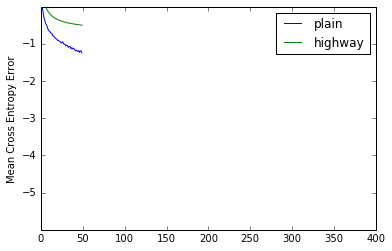

In [51]:
plt.ylim(-6,0)
plt.yticks([-1, -2, -3, -4, -5])
plt.ylabel('Mean Cross Entropy Error')
plt.xlim(0, 400)

plt.plot(np.log10(plain_error[8]), label = 'plain')
plt.plot(np.log10(highway_error[8]), label = 'highway')
plt.legend()

In [53]:
#plt.ylim(0.00001,0.1)
#plt.yticks([0.00001, 0.0001, 0.001, 0.01, 0.1])
#plt.xlim(0, 400)

fig = plt.figure(figsize=(10,10))

for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.plot(np.log10(plain_error[8]), label = 'plain')
    ax.plot(np.log10(highway_error[i]),label = 'highway')
    plt.ylim(-6,0)
    plt.yticks([-1, -2, -3, -4, -5])
    plt.xlim(0, 400)
    plt.legend()

# The first 10 random search does not have good result for highway so re-do the random search again

In [2]:
import theano
import theano.tensor as T
import numpy as np
from mnist import test_mlp

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5105)


In [28]:
# Random Search of hyper parameters
random_state = np.random.RandomState(1908)
log_learning_rate = random_state.uniform(low=-1,high=-5,size=10).astype(np.float32)

learning_rate = 10 ** log_learning_rate

learning_rate_decay = random_state.uniform(low=0.994,high=0.999,size=10).astype(np.float32)
        
momentum = random_state.uniform(low=0.5,high=0.9,size=10).astype(np.float32)

bias_init = random_state.uniform(low=-10,high=-1,size=10).astype(np.float32)

activation = random_state.binomial(1,0.5,size=10).astype(np.int)

In [32]:
bias_init[8]

-5.884789

In [33]:
test_score_plain, last_train_error, train_error_plain = test_mlp(learning_rate=learning_rate[8], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=400, highway=False, bias_init = None, 
                                   learning_rate_decay=learning_rate_decay[8], momentum=momentum[8], 
                                    batch_size=20, n_hidden=[71]*50, 
                                   n_hidden_layer=50, verbose=True, activation=activation[8])

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 1.673530  train loss 1.687951  learning_rate 0.000201
     epoch 1, minibatch 2500/2500, test error of best model 54.230000 %
epoch 2, minibatch 2500/2500, validation loss 1.120890  train loss 1.139079  learning_rate 0.000200
     epoch 2, minibatch 2500/2500, test error of best model 37.130000 %
epoch 3, minibatch 2500/2500, validation loss 0.783893  train loss 0.805510  learning_rate 0.000200
     epoch 3, minibatch 2500/2500, test error of best model 22.630000 %
epoch 4, minibatch 2500/2500, validation loss 0.597551  train loss 0.613513  learning_rate 0.000200
     epoch 4, minibatch 2500/2500, test error of best model 15.860000 %
epoch 5, minibatch 2500/2500, validation loss 0.476229  train loss 0.491576  learning_rate 0.000199
     epoch 5, minibatch 2500/2500, test error of best model 11.820000 %
epoch 6, minibatch 2500/2500, validation loss 0.388485  train loss 0.400783  learning_r

The code for file __file__ ran for 246.91m


In [16]:
# Random Search of hyper parameters
random_state = np.random.RandomState(94457)
log_learning_rate = random_state.uniform(low=-1,high=-5,size=20).astype(np.float32)

learning_rate = 10 ** log_learning_rate

learning_rate_decay = random_state.uniform(low=0.994,high=0.999,size=20).astype(np.float32)
        
momentum = random_state.uniform(low=0.5,high=0.9,size=20).astype(np.float32)

bias_init = random_state.uniform(low=-10,high=-1,size=20).astype(np.float32)

activation = random_state.binomial(1,0.5,size=20).astype(np.int)

In [21]:
highway_score = []
highway_error = []
for i in range(1,10):
    test_score_high, last_train_error1, train_error_highway = test_mlp(learning_rate=learning_rate[i], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=60, highway=True, bias_init = bias_init[i], 
                                   learning_rate_decay=learning_rate_decay[i], momentum=momentum[i], 
                                    batch_size=20, n_hidden=[50]*50, 
                                   n_hidden_layer=50, verbose=True, activation=activation[i])
    
    highway_score.append(last_train_error1)
    highway_error.append(train_error_highway)
    
    print ("####################################################")
    print("iter: %f type: 'highway' loss %f" %(i,last_train_error1))
    print ("####################################################")

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.301817  train loss 2.301282  learning_rate 0.001480
     epoch 1, minibatch 2500/2500, test error of best model 88.650000 %
epoch 2, minibatch 2500/2500, validation loss 2.301721  train loss 2.300950  learning_rate 0.001471
     epoch 2, minibatch 2500/2500, test error of best model 88.650000 %
epoch 3, minibatch 2500/2500, validation loss 2.301693  train loss 2.300820  learning_rate 0.001462
     epoch 3, minibatch 2500/2500, test error of best model 88.650000 %
epoch 4, minibatch 2500/2500, validation loss 2.301649  train loss 2.300731  learning_rate 0.001453
     epoch 4, minibatch 2500/2500, test error of best model 88.650000 %
epoch 5, minibatch 2500/2500, validation loss 2.301587  train loss 2.300650  learning_rate 0.001445
     epoch 5, minibatch 2500/2500, test error of best model 88.650000 %
epoch 6, minibatch 2500/2500, validation loss 2.301513  train loss 2.300567  learning_r

The code for file __file__ ran for 127.75m
The code for file __file__ ran for 104.09m


Optimization complete. Best validation score of 12.923579 % obtained at iteration 17500, with test performance 3.540000 %
####################################################
iter: 2.000000 type: 'highway' loss 0.000151
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.244916  train loss 0.263139  learning_rate 0.018742
     epoch 1, minibatch 2500/2500, test error of best model 7.220000 %
epoch 2, minibatch 2500/2500, validation loss 0.181326  train loss 0.187444  learning_rate 0.018720
     epoch 2, minibatch 2500/2500, test error of best model 5.420000 %
epoch 3, minibatch 2500/2500, validation loss 0.150146  train loss 0.147606  learning_rate 0.018699
     epoch 3, minibatch 2500/2500, test error of best model 4.540000 %
epoch 4, minibatch 2500/2500, validation loss 0.131901  train loss 0.122171  learning_rate 0.018677
     epoch 4, minibatch 2500/2500, test error of best model 


The code for file __file__ ran for 103.76m


Optimization complete. Best validation score of 9.181657 % obtained at iteration 40000, with test performance 2.590000 %
####################################################
iter: 3.000000 type: 'highway' loss 0.003004
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.096373
epoch 2, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.096003
epoch 3, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.095635
epoch 4, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.095268
epoch 5, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.094902
epoch 6, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.094538
epoch 7, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.094175
epoch 8, minibatch 2500/2500, validation los


The code for file __file__ ran for 104.95m


Optimization complete. Best validation score of inf % obtained at iteration 1, with test performance 0.000000 %
####################################################
iter: 4.000000 type: 'highway' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.299104  train loss 2.298454  learning_rate 0.002105
     epoch 1, minibatch 2500/2500, test error of best model 88.630000 %
epoch 2, minibatch 2500/2500, validation loss 2.292514  train loss 2.291246  learning_rate 0.002101
     epoch 2, minibatch 2500/2500, test error of best model 87.120000 %
epoch 3, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.002097
epoch 4, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.002093
epoch 5, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.002089
epoch 6, minibatch 2500/2500, validation loss nan  train loss nan  learnin


The code for file __file__ ran for 112.02m


Optimization complete. Best validation score of 229.251409 % obtained at iteration 5000, with test performance 87.120000 %
####################################################
iter: 5.000000 type: 'highway' loss nan
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.301978  train loss 2.301929  learning_rate 0.000084
     epoch 1, minibatch 2500/2500, test error of best model 88.650000 %
epoch 2, minibatch 2500/2500, validation loss 2.301389  train loss 2.301296  learning_rate 0.000084
     epoch 2, minibatch 2500/2500, test error of best model 88.650000 %
epoch 3, minibatch 2500/2500, validation loss 2.300814  train loss 2.300679  learning_rate 0.000083
     epoch 3, minibatch 2500/2500, test error of best model 88.650000 %
epoch 4, minibatch 2500/2500, validation loss 2.300251  train loss 2.300077  learning_rate 0.000083
     epoch 4, minibatch 2500/2500, test error of best model 8


The code for file __file__ ran for 102.69m


Optimization complete. Best validation score of 220.614982 % obtained at iteration 150000, with test performance 75.740000 %
####################################################
iter: 6.000000 type: 'highway' loss 2.205730
####################################################
... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.022055
epoch 2, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.022018
epoch 3, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.021981
epoch 4, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.021944
epoch 5, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.021907
epoch 6, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.021870
epoch 7, minibatch 2500/2500, validation loss nan  train loss nan  learning_rate 0.021833
epoch 8, minibatch 2500/2500, validation

KeyboardInterrupt: 

In [23]:
test_score_high, last_train_error1, train_error_highway = test_mlp(learning_rate=learning_rate[2], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=400, highway=True, bias_init = bias_init[2], 
                                   learning_rate_decay=learning_rate_decay[2], momentum=momentum[2], 
                                    batch_size=20, n_hidden=[50]*50, 
                                   n_hidden_layer=50, verbose=True, activation=activation[2])

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.186771  train loss 0.194487  learning_rate 0.092488
     epoch 1, minibatch 2500/2500, test error of best model 5.940000 %
epoch 2, minibatch 2500/2500, validation loss 0.161938  train loss 0.154322  learning_rate 0.091949
     epoch 2, minibatch 2500/2500, test error of best model 4.980000 %
epoch 3, minibatch 2500/2500, validation loss 0.160040  train loss 0.132161  learning_rate 0.091413
     epoch 3, minibatch 2500/2500, test error of best model 4.880000 %
epoch 4, minibatch 2500/2500, validation loss 0.164392  train loss 0.128913  learning_rate 0.090881
epoch 5, minibatch 2500/2500, validation loss 0.138036  train loss 0.094293  learning_rate 0.090352
     epoch 5, minibatch 2500/2500, test error of best model 3.890000 %
epoch 6, minibatch 2500/2500, validation loss 0.130236  train loss 0.085161  learning_rate 0.089825
     epoch 6, minibatch 2500/2500, test error of best model 3.9

The code for file __file__ ran for 672.80m


In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

/home/ubuntu/miniconda2/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


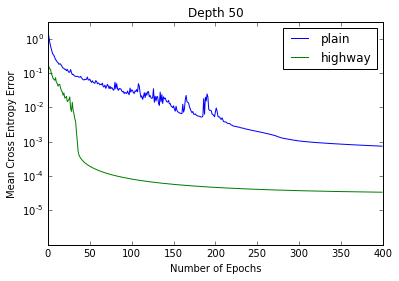

In [35]:
plt.ylim(-6,0.5)
plt.yticks([0,-1, -2, -3, -4, -5],
           ('$\mathregular{10^0}$','$\mathregular{10^{-1}}$','$\mathregular{10^{-2}}$','$\mathregular{10^{-3}}$',
            '$\mathregular{10^{-4}}$','$\mathregular{10^{-5}}$'))

plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.xlim(0, 400)
plt.title('Depth 50')

plt.plot(np.log10(train_error_plain), label = 'plain')
plt.plot(np.log10(train_error_highway), label = 'highway')
plt.legend()
plt.show()